# **Analysis and Prediction of AMZ Stock's Closing Price**

This project aims to analyze Amazon stock and then predict the future values of its close price.

## **Exploring and Cleaning the data:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Our dataset :
df = pd.read_excel('/content/AMZ.Stock.xlsx')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-06-01,2.5600,3.015,1.7525,1.880,1.880,10476000
1,2000-07-01,1.8650,2.330,1.5100,1.575,1.575,7818000
2,2000-08-01,1.6425,2.460,1.6050,2.400,2.400,5406000
3,2000-09-01,2.3800,2.790,2.1050,2.230,2.230,6170000
4,2000-10-01,2.1750,2.220,1.1400,1.900,1.900,7972000


In [ ]:
# Setting date as an index :
df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-06-01,2.5600,3.015,1.7525,1.880,1.880,10476000
2000-07-01,1.8650,2.330,1.5100,1.575,1.575,7818000
2000-08-01,1.6425,2.460,1.6050,2.400,2.400,5406000
2000-09-01,2.3800,2.790,2.1050,2.230,2.230,6170000
2000-10-01,2.1750,2.220,1.1400,1.900,1.900,7972000


In [ ]:
df.shape

(289, 6)

In [ ]:
df.size

1734

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 289 entries, 2000-06-01 to 2024-05-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       289 non-null    float64
 1   High       289 non-null    float64
 2   Low        289 non-null    float64
 3   Close      289 non-null    float64
 4   Adj Close  289 non-null    float64
 5   Volume     289 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 15.8 KB


We don't have null values in our dataset.

In [ ]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,289.000000,289.000000,289.000000,289.000000,289.000000,2.890000e+02
mean,36.145894,38.855344,33.840778,36.671744,36.671744,1.387188e+06
std,48.754953,52.185215,45.768710,49.233034,49.233034,2.781720e+06
min,0.345000,0.525000,0.307500,0.325000,0.325000,1.939000e+03
25%,1.985000,2.230000,1.670000,1.982500,1.982500,3.232860e+05
50%,8.783450,9.110000,8.350000,8.910000,8.910000,5.864200e+05
75%,65.149498,73.428497,62.741001,69.741501,69.741501,1.098000e+06
max,169.500000,178.279999,168.800003,169.979996,169.979996,2.508000e+07


## **EDA (Exploratory Data Analysis)**

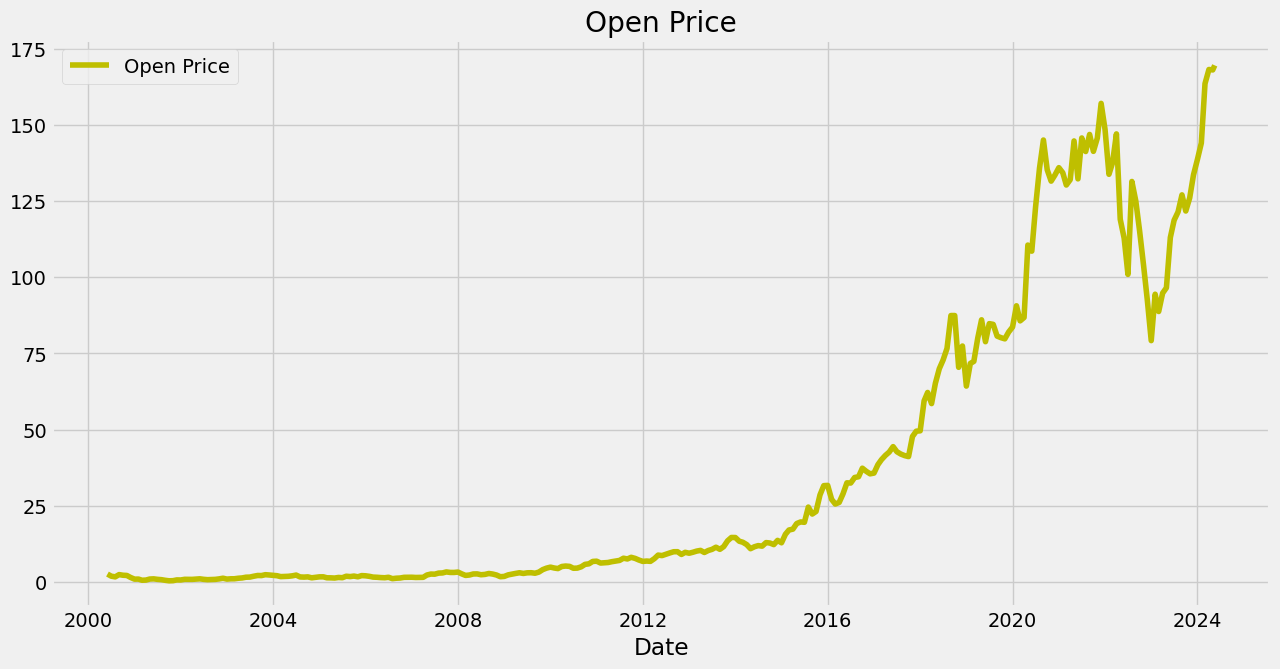

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(14, 7))
plt.plot(df['Open'], label = 'Open Price', color = 'y')
plt.xlabel('Date')
plt.ylabel('')
plt.title('Open Price')
plt.legend()
plt.show()

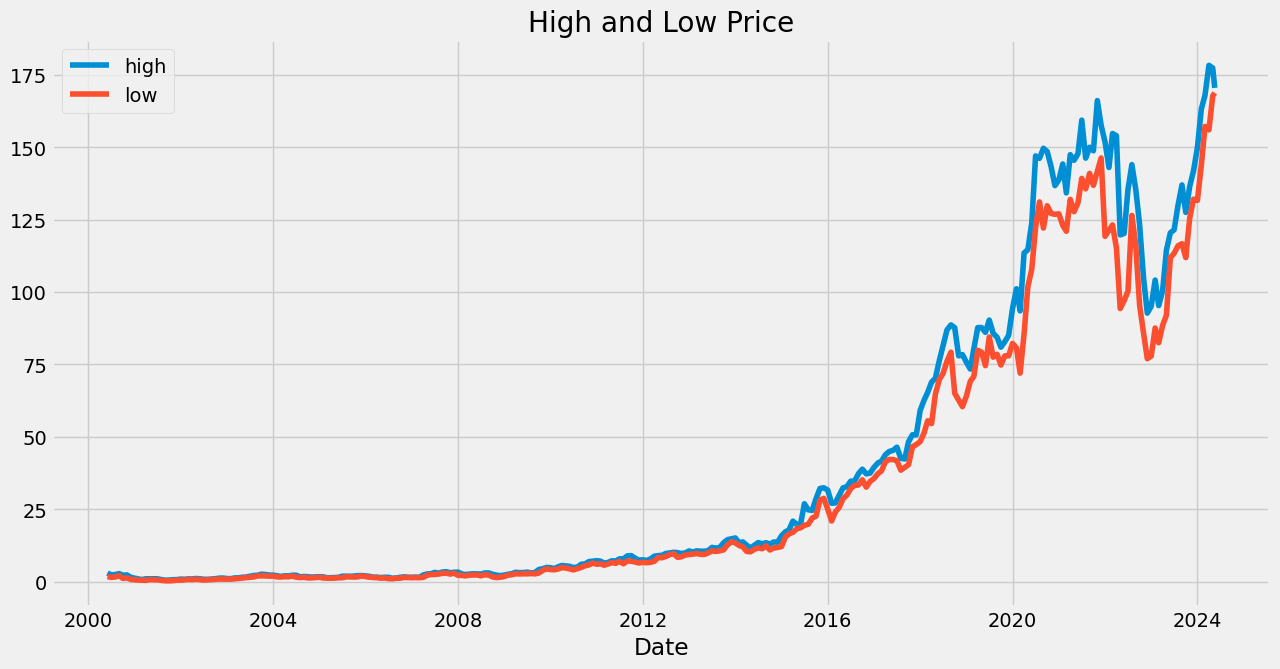

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(14, 7))
plt.plot(df['High'], label = 'high')
plt.plot(df['Low'], label = 'low')
plt.xlabel('Date')
plt.ylabel('')
plt.title('High and Low Price')
plt.legend()
plt.show()

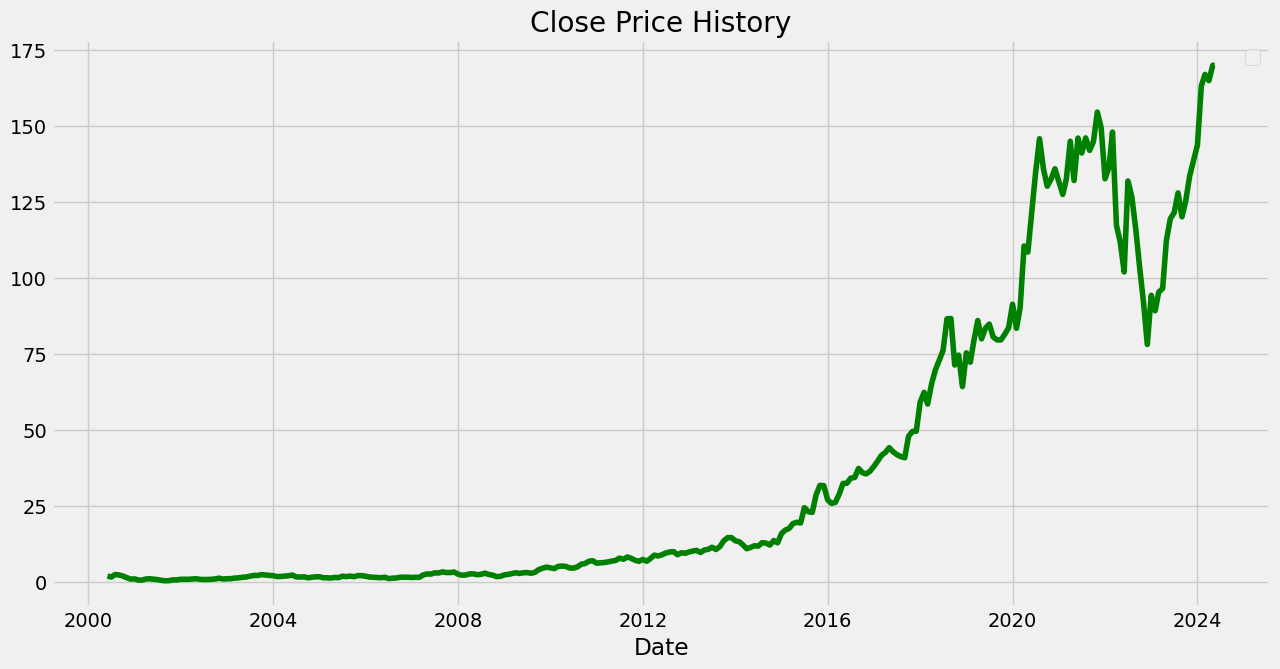

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], color ='g')
plt.xlabel('Date')
plt.ylabel('')
plt.title('Close Price History')
plt.legend()
plt.show()

# **Forecasting the Closing Price**

In [ ]:
# Splitting the data into train and test :
from sklearn.model_selection import train_test_split

data = pd.DataFrame(df['Close'])

split_date = '01-01-2020'
train = data.loc[:split_date]
test = data.loc[split_date:]

In [ ]:
print(train.shape, test.shape)

(236, 1) (54, 1)


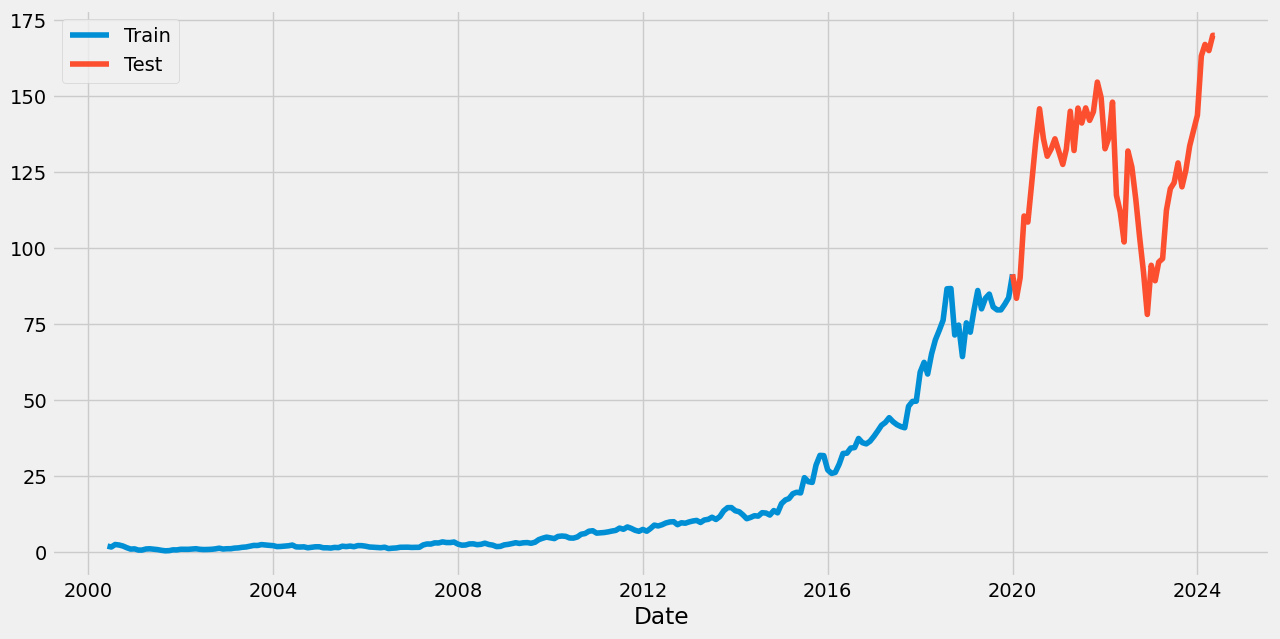

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(14, 7))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.xlabel('Date')
plt.ylabel('')
plt.legend()
plt.show()

## **ARIMA/ SARIMA Models :**

In [ ]:
!pip install pmdarima --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.3 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

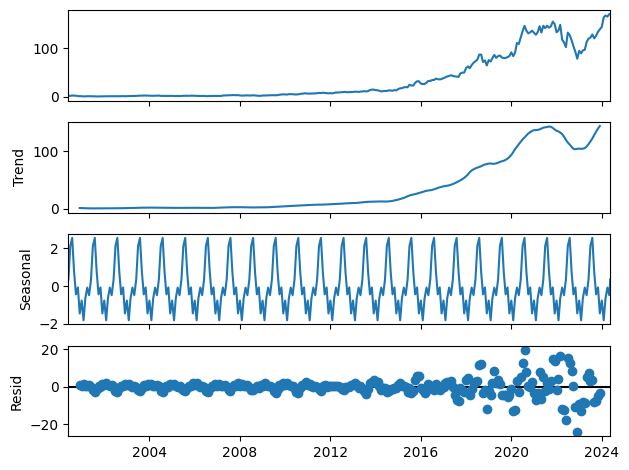

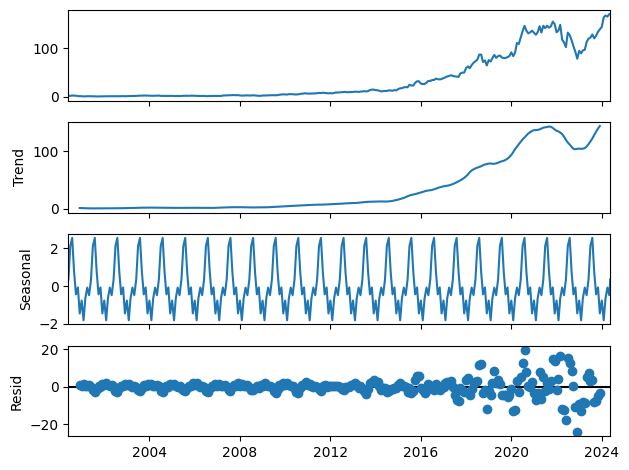

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data, period = 12)
result.plot()

We can clearly see that our serie is seasonal and shows an upward trend in the closing price of the stock; means the serie is not stationary








In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 1.098718587039885
p-value: 0.9952056713787661


The p-value is 0.99 so it is superior than 0.05. This mean that the serie is not stationary. To make it stationary, we need to use the diff function or seasonal diff.

In [ ]:
model_1 = auto_arima(train, start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1039.704, Time=0.78 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1154.725, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1028.078, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1037.732, Time=0.50 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1156.296, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1026.604, Time=0.49 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=1023.978, Time=3.54 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1024.289, Time=1.09 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=1024.744, Time=2.71 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=1022.915, Time=1.60 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=1030.110, Time=1.21 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1037.569, Time=0.39 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1025.774, Time=1.25 sec
 ARIMA(2,1,0)(1,1,2)[12]             : AIC=1024.795, Time=1.90 sec
 ARIMA(1,1,1)(1,1,2

In [ ]:
model_2 = ARIMA(train, order = (1,1,0), seasonal_order = (1,1,0,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  236
Model:             SARIMAX(1, 1, 0)x(1, 1, [1, 2], 12)   Log Likelihood                -504.879
Date:                                 Sun, 30 Jun 2024   AIC                           1021.758
Time:                                         14:20:50   BIC                           1042.201
Sample:                                     06-01-2000   HQIC                          1030.010
                                          - 01-01-2020                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1708      0.093      1.834      0.067      -0.012       0.353
ar.L1         -0.1595      0.042     -3.833      0.000      -0.241      -0.078
ar.S.L12      -0.8308      0.147     -5.657      0.000      -1.119      -0.543
ma.S.L12      -0.1058      0.162     -0.654      0.513      -0.423       0.211
ma.S.L24      -0.3745      0.195     -1.922      0.055      -0.756       0.007
sigma2         5.1004      0.240     21.282      0.000       4.631       5.570
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2747.59
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):             155.01   Skew:                            -0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
fit = model_2.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                            Close   No. Observations:                  236
Model:             ARIMA(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -511.039
Date:                          Sun, 30 Jun 2024   AIC                           1028.078
Time:                                  14:20:54   BIC                           1038.299
Sample:                              06-01-2000   HQIC                          1032.204
                                   - 01-01-2020                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1699      0.039     -4.322      0.000      -0.247      -0.093
ar.S.L12      -0.7876      0.028    -27.986      0.000      -0.843      -0.732
sigma2         5.4369      0.176     30.956      0.000       5.093       5.781
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              2892.45
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):             189.84   Skew:                            -0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

model_2 compared to model_1 gives the best performance in term of mininal value of AIC. (model_1 is actually the model that gives the min value of AIC on our training dataset)

MSE: 894.3332608976589 RMSE: 29.905405212062565


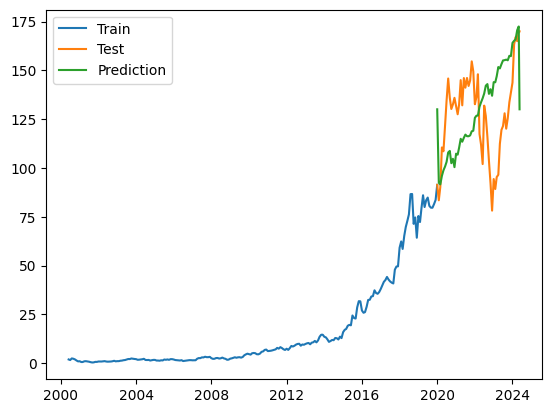

In [ ]:
# Forecasting on the test set
model_1.fit(train)

forecast = model_1.predict(n_periods = len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])
forecast = forecast.fillna(forecast.mean()) #to fill null values in forecast

# Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print(f'MSE: {mse}',f'RMSE: {rmse}')

#plot the predictions for validation set
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction')
plt.legend()
plt.show()

## **XG Boost**

In [ ]:
!pip install xgboost --quiet

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
def create_features(df, label=None):
    df['date'] = df.index
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['week'] = df.index.isocalendar().week
    X = df[[ 'dayofweek', 'quarter', 'month', 'year',
            'dayofyear', 'dayofmonth', 'week']]
    if label:
        y = df[label]
        return X, y
    return X

X_train, y_train = create_features(train, label = 'Close')
X_test, y_test = create_features(test,  label = 'Close')

<ipython-input-18-b8a0f7403eab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df.index
<ipython-input-18-b8a0f7403eab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.dayofweek
<ipython-input-18-b8a0f7403eab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

MSE: 1837.184814145156 RMSE: 42.86239393856993


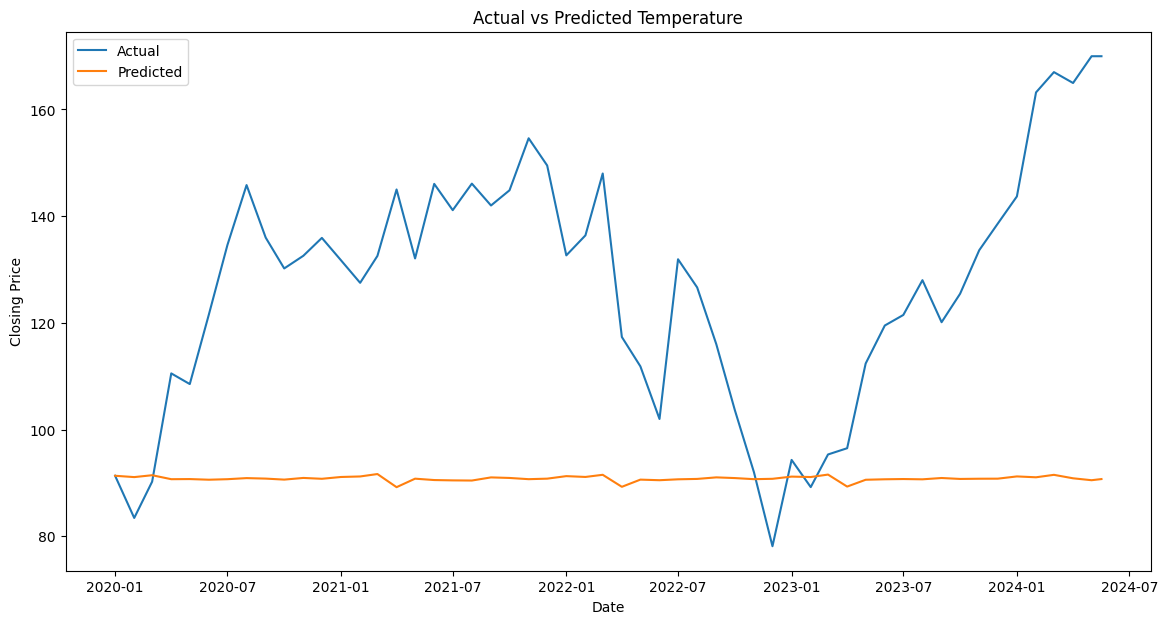

In [ ]:
#Forecasting on test set :

y_pred = reg.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}',f'RMSE: {rmse}')

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Temperature')
plt.legend()
plt.show()

## **LSTM RNN**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
split_date = '01-01-2020'
train_ = data.loc[:split_date]
test_ = data.loc[split_date:]

In [ ]:
# Scaling the data

scaler = MinMaxScaler()
scaler.fit(data)
scaled_train = scaler.transform(train_)
scaled_test = scaler.transform(test_)

In [ ]:
#Create sequences of data that will be fed into the LSTM model. This involves creating input-output pairs from the time series data

def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 12
X_train, y_train = create_sequences(scaled_train, n_steps)
X_test, y_test = create_sequences(scaled_test, n_steps)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
look_back = 12

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
224/224 - 6s - loss: 0.0037 - 6s/epoch - 26ms/step
Epoch 2/20
224/224 - 2s - loss: 8.2737e-04 - 2s/epoch - 9ms/step
Epoch 3/20
224/224 - 2s - loss: 0.0012 - 2s/epoch - 9ms/step
Epoch 4/20
224/224 - 3s - loss: 7.0384e-04 - 3s/epoch - 12ms/step
Epoch 5/20
224/224 - 3s - loss: 5.7764e-04 - 3s/epoch - 12ms/step
Epoch 6/20
224/224 - 3s - loss: 6.6032e-04 - 3s/epoch - 12ms/step
Epoch 7/20
224/224 - 2s - loss: 5.1784e-04 - 2s/epoch - 10ms/step
Epoch 8/20
224/224 - 2s - loss: 6.7333e-04 - 2s/epoch - 8ms/step
Epoch 9/20
224/224 - 2s - loss: 5.2820e-04 - 2s/epoch - 7ms/step
Epoch 10/20
224/224 - 3s - loss: 5.2877e-04 - 3s/epoch - 14ms/step
Epoch 11/20
224/224 - 3s - loss: 7.5102e-04 - 3s/epoch - 13ms/step
Epoch 12/20
224/224 - 3s - loss: 5.4759e-04 - 3s/epoch - 15ms/step
Epoch 13/20
224/224 - 4s - loss: 6.5127e-04 - 4s/epoch - 17ms/step
Epoch 14/20
224/224 - 3s - loss: 4.8691e-04 - 3s/epoch - 11ms/step
Epoch 15/20
224/224 - 3s - loss: 3.9666e-04 - 3s/epoch - 12ms/step
Epoch 16/20
224/

In [ ]:
# Generate predictions
predictions = model.predict(X_test)

# Inverse transform predictions to original scale
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 9ms/step


Mean Squared Error (MSE): 219.00173825926328 Root Mean Squared Error (RMSE): 14.79870731717008


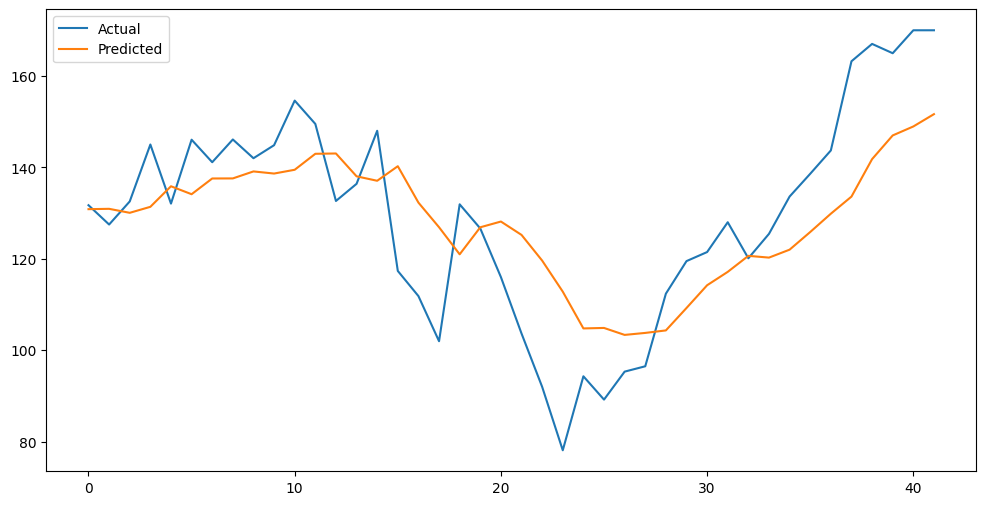

In [ ]:
# Inverse transform test data to original scale
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate MSE
mse = mean_squared_error(y_test_original, predictions)
rmse = np.sqrt(mse)
print(f'Mean Squared Error (MSE): {mse}', f'Root Mean Squared Error (RMSE): {rmse}')

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

## **FB Prophet**

In [ ]:
!pip install prophet  --quiet

In [ ]:
import prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [ ]:
dfr = pd.read_excel('/content/AMZ.Stock.xlsx')

In [ ]:
Df = dfr.drop(columns=['High', 'Low', 'Volume', 'Open','Adj Close'])
Df

,Date,Close
0,2000-06-01,1.880000
1,2000-07-01,1.575000
2,2000-08-01,2.400000
3,2000-09-01,2.230000
4,2000-10-01,1.900000
...,...,...
284,2024-02-01,163.199997
285,2024-03-01,167.000000
286,2024-04-01,164.960007
287,2024-05-01,169.979996


In [ ]:
Df.columns = ['ds', 'y']
Df['ds'] = pd.to_datetime(Df['ds'])

In [ ]:
split_date = '01-01-2020'
Df_train = Df.loc[Df['ds'] <= split_date].copy()
Df_test = Df.loc[Df['ds']> split_date].copy()

In [ ]:
m = Prophet()
m.fit(Df_train)
future_test = pd.DataFrame(Df_test['ds'])
forecast = m.predict(future_test)

# Extract the predicted values
predicted = forecast['yhat']

# Extract the actual values
actual = Df_test['y']

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaa4_8ven/xp4ihk6q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaa4_8ven/hqylw5ld.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64069', 'data', 'file=/tmp/tmpaa4_8ven/xp4ihk6q.json', 'init=/tmp/tmpaa4_8ven/hqylw5ld.json', 'output', 'file=/tmp/tmpaa4_8ven/prophet_model67tpcc1v/prophet_model-20240629172301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:23:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:23:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Calculate MSE
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
print(f'Mean Squared Error (MSE): {mse}', f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 747.8910573243179 Root Mean Squared Error (RMSE): 27.347596920466668


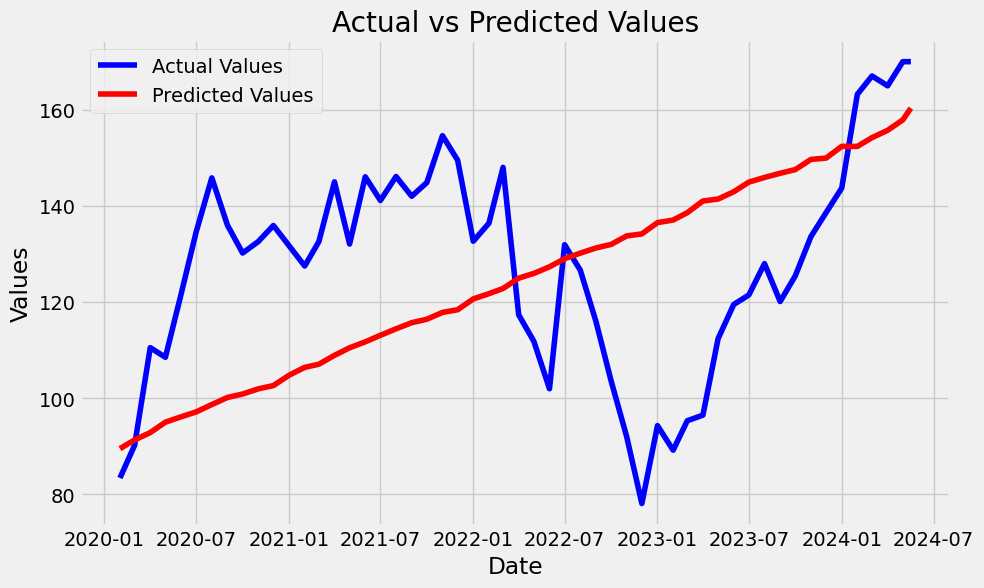

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(Df_test['ds'], actual, label='Actual Values', color='blue')
plt.plot(Df_test['ds'], predicted, label='Predicted Values', color='red')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()

## **MSE and RMSE**

In [ ]:
models = ["Sarima", "LSTM RNN", "FB Prophet",  "XG Boost"]
MSE = [894.3332608976589, 219.00173825926328,  747.8910573243179, 1837.184814145156]
RMSE = [29.905405212062565,14.79870731717008 , 27.347596920466668,42.86239393856993]

In [ ]:
Errors = pd.DataFrame({
'Models': models,
    'MSE': MSE,
    'RMSE': RMSE
})

In [ ]:
Errors

,Models,MSE,RMSE
0,Sarima,894.333261,29.905405
1,LSTM RNN,219.001738,14.798707
2,FB Prophet,747.891057,27.347597
3,XG Boost,1837.184814,42.862394


We can clearly see the model that gave the best results on our training dataset is **LSTM RNN** since it gave the minimal values of MSE and RMSE.    
**LSTM RNN**'s predictions were the most accurate based on the visualization of predicted and actual values.
